# CAR PRICE PREDICTION

In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [551]:
df=pd.read_csv('/Users/draculalemon/Documents/macbook file/csvfile/CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()
#CHECKING FOR MISSING VAL

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [558]:
# removing the car name from the company name column
car=df['CarName'].str.split(" ",n=1,expand=True)
df['CompanyName']=car[0]

In [559]:
df.drop(['CarName'],axis=1,inplace=True)

In [560]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [561]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [562]:
df.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
renault         2
vw              2
porcshce        1
mercury         1
toyouta         1
vokswagen       1
Nissan          1
Name: CompanyName, dtype: int64

In [563]:
#checking for duplicates value
df.loc[df.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

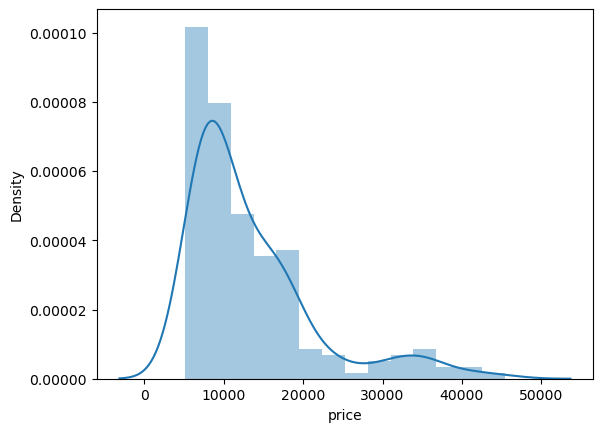

In [564]:
sns.distplot(df['price'])

checkin the car price range,
seems most of the car having the price between 10k-25k$

In [565]:
#getting over all price distribution of price columns
df[['price']].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


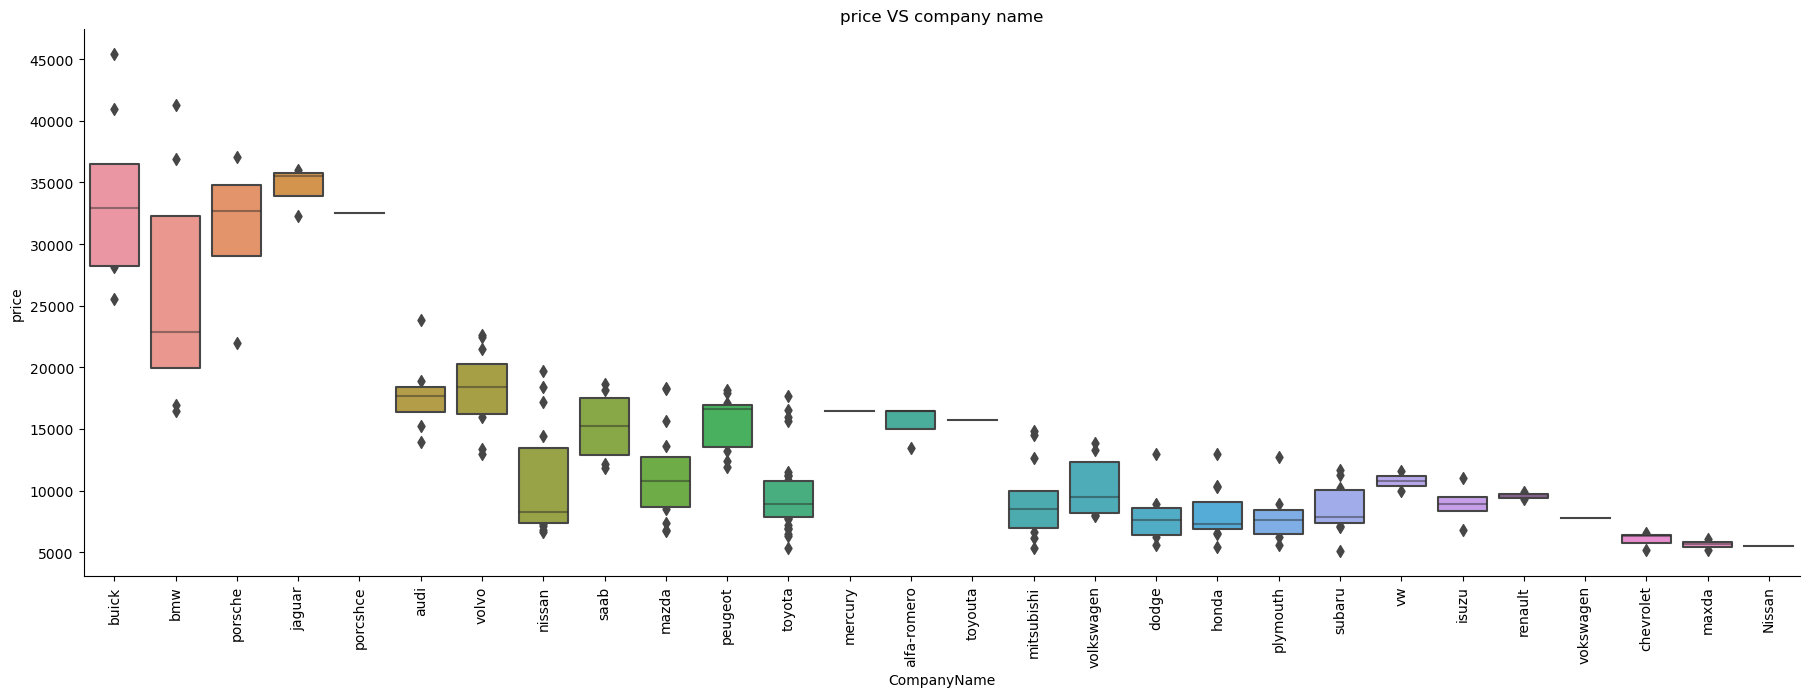

In [566]:
#checking which car brand is more costly at what price range in the market
sns.catplot(y="price",x="CompanyName",data=df.sort_values('price',ascending=False),kind="boxen",height=6,aspect=3)
plt.title('price VS company name')
plt.xticks(rotation ='vertical')
plt.show()

seems buick and bmw and porsche are the top three compy having higher price range in the market

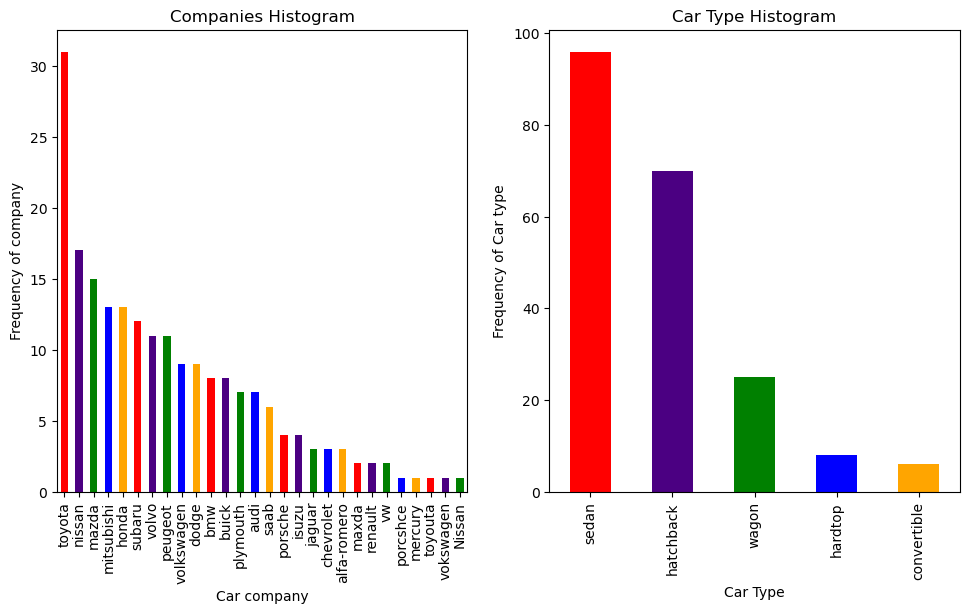

In [567]:
plt.figure(figsize=(18, 6))
c = ['red', 'indigo', 'green', 'blue', 'orange']
plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar',color=c)
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.carbody.value_counts().plot(kind='bar',color=c)
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

from the first grap above we can say that TOYOTA,NISSAN,MAZDA are the top three company having huge sale,
and from the second grapn we can tell that people are generally buying sedan followed by hatchback due to price compatibility  and ,
convertable at last due to due to higher price.

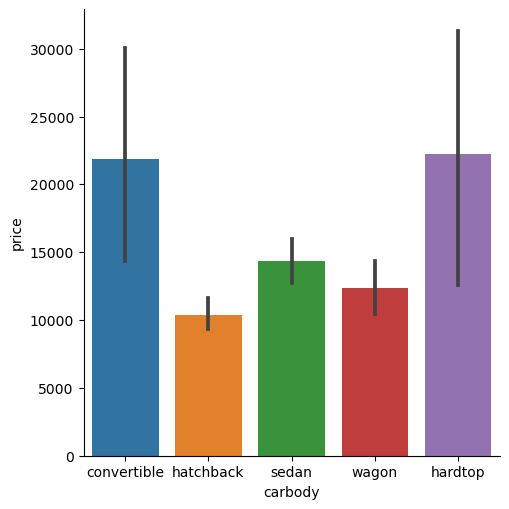

In [21]:
# cheking price according to the car type 
sns.catplot(x=df['carbody'],y=df['price'],data=df.sort_values('price',ascending=False),kind='bar')

we can conclude that convertible are more costilier which proof our above conclusion that people
are buying less convertible due to high price.

In [22]:
#checking diesel vs fuel price avg
df['avg_price']=df['price'].mean()

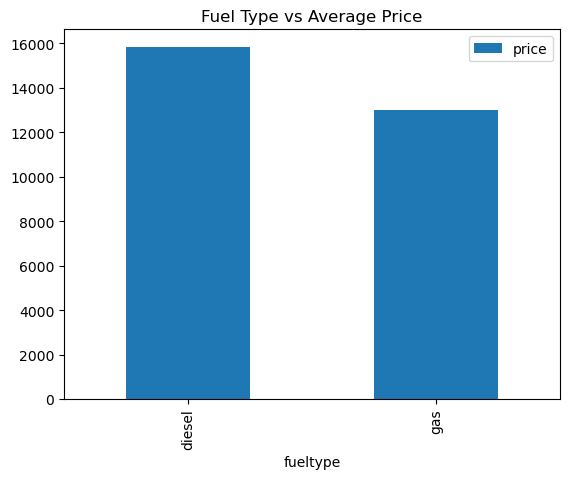

In [23]:
df4 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

inferance drawn that diesel are little more expensive than gas

<AxesSubplot:xlabel='carbody', ylabel='price'>

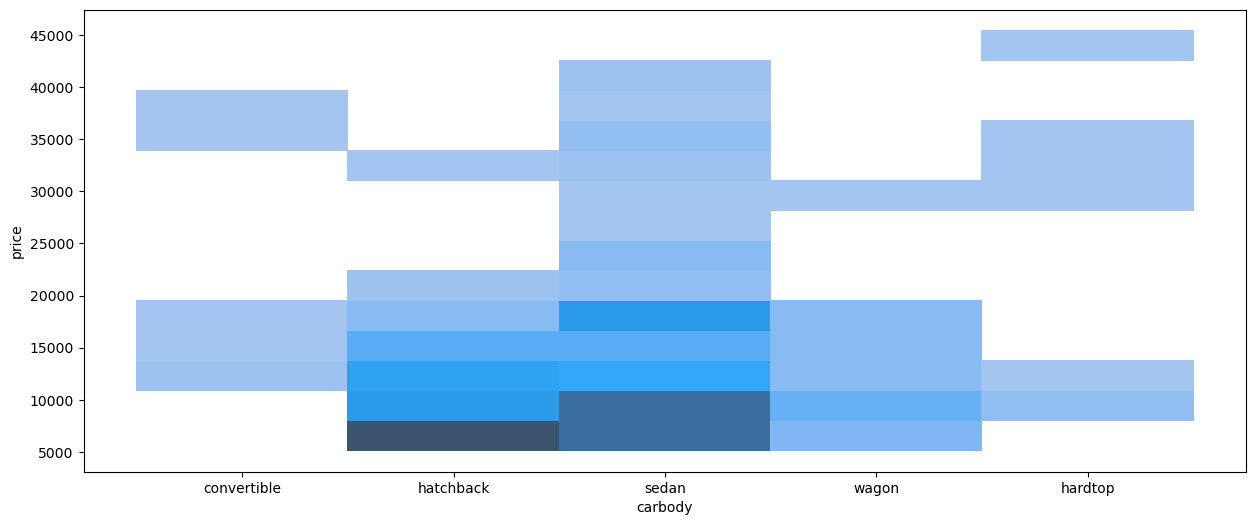

In [16]:
# checking which car type is purchase more acording to the price
plt.figure(figsize=(15, 6))
sns.histplot(x=df['carbody'],y=df['price'])

The more deeper region more sales.
people are buying more sedan at the price range between 10k-5k and also buying hatchback at the
price range between 5k-5.5k

[Text(0.5, 0, 'Car Type'), Text(0, 0.5, 'Frequency of Car type')]

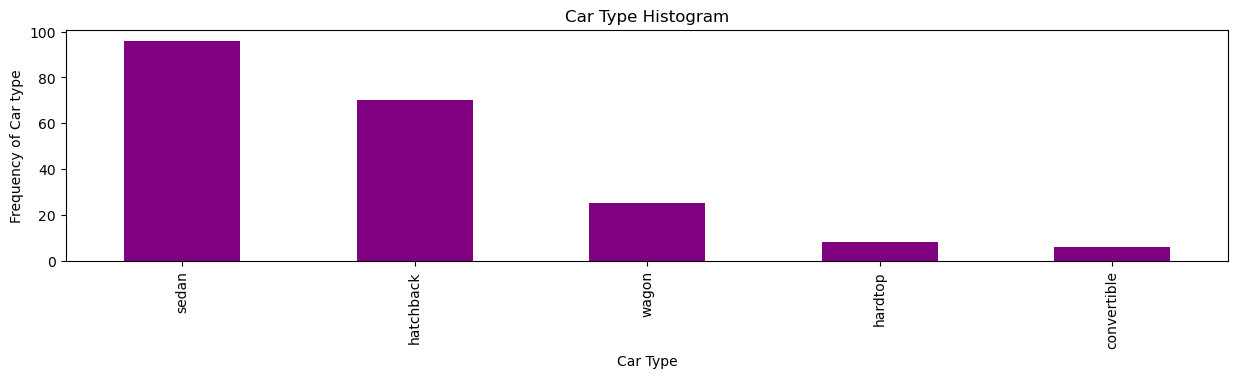

In [28]:
plt.figure(figsize=(15,3))
plt1 = df.carbody.value_counts().plot(kind='bar',color='purple')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

people are buying more sedan due to there price compatibility followed buy hathback

In [29]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

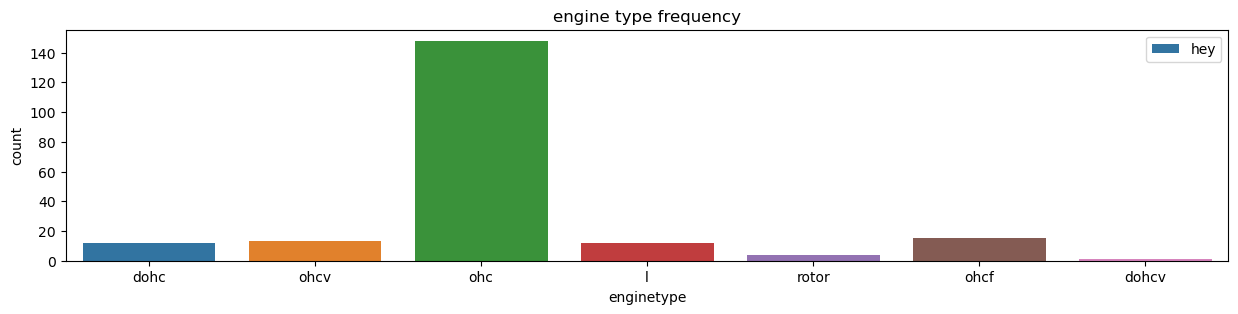

In [33]:
#checking the frequency of engine type
plt.figure(figsize=(15,3))
plt.title('engine type frequency')
ax = sns.countplot(data=df, x='enginetype')
ax.legend(labels=['hey'])

ohc = OVERHEAD CRAMSHAFT  engine are highest in car we can conclued these engine are generally used in sedan for being reasonable pricier

In [568]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

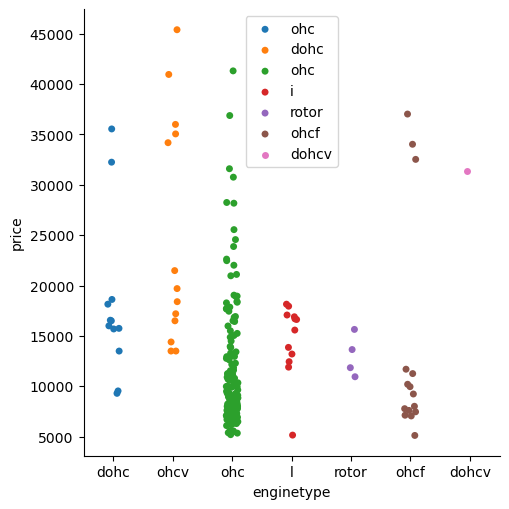

In [569]:
#checking engine type according to its price

sns.catplot(x=df['enginetype'],y=df['price'],data=df)
plt.legend(labels=['ohc','dohc','ohc','i','rotor','ohcf','dohcv'])

as we can see that our conclusion were right 'ohc' engine are cheaper that other engine.

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Door Number vs Price'}, xlabel='doornumber', ylabel='price'>

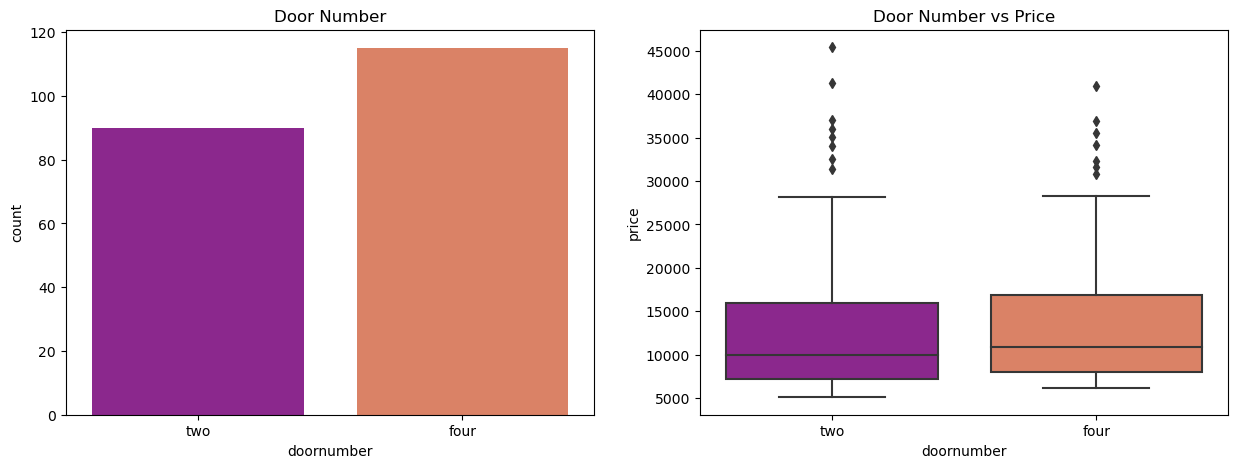

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df['doornumber'], y=df['price'], palette=("plasma"))


four door car are more frequent than two door and as we already know generall two door car are called convertable and they were expensive so is obvious people are buying less expensive car such as sedan and hatchback.

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Aspiration vs Price'}, xlabel='aspiration', ylabel='price'>

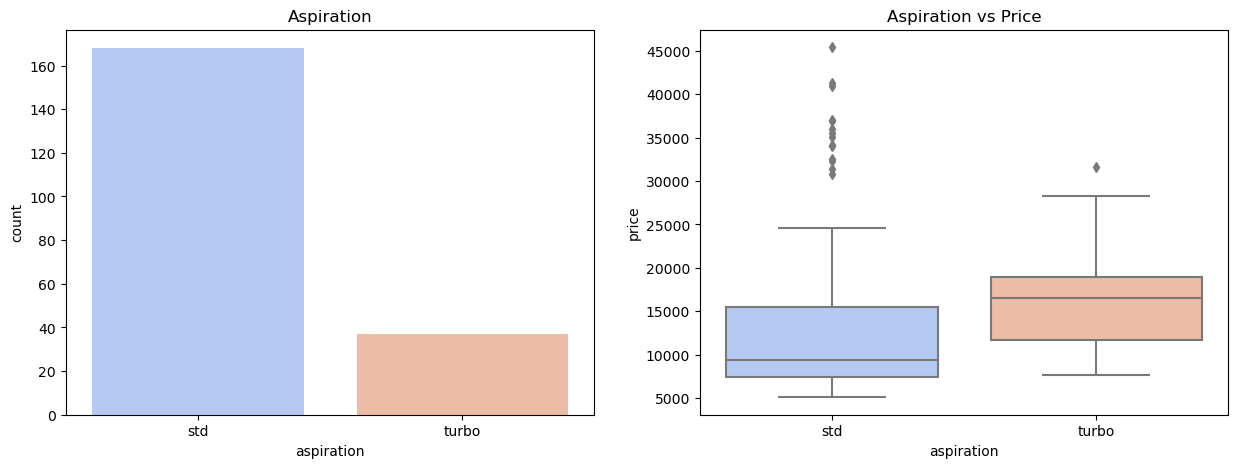

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(df.aspiration, palette=("coolwarm"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("coolwarm"))


std= standard aspiration
people are buying std due to less in price as we can see in the graph beside

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'engine_location vs Price'}, xlabel='enginelocation', ylabel='price'>

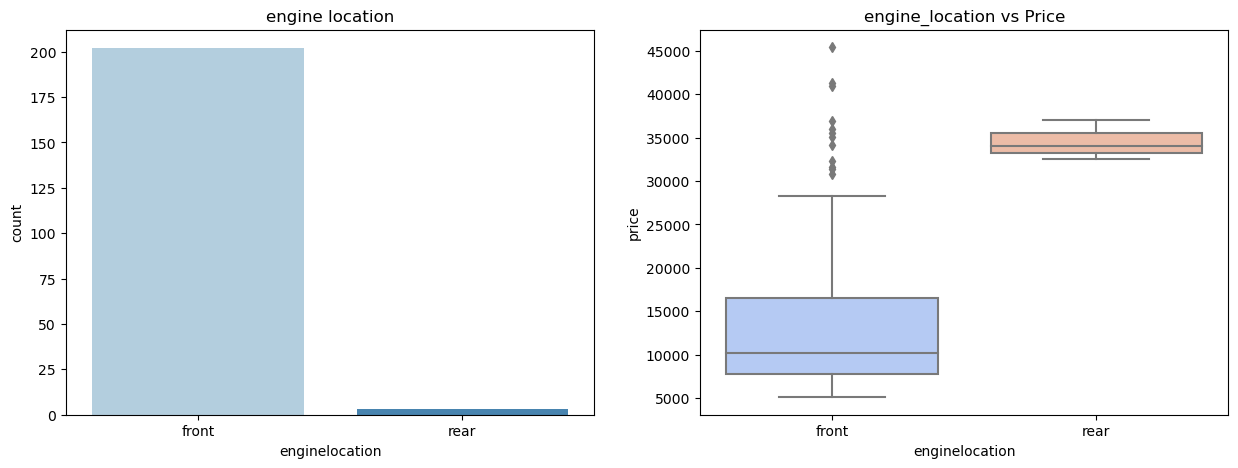

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('engine location')
sns.countplot(df.enginelocation, palette=("Blues"))

plt.subplot(1,2,2)
plt.title('engine_location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("coolwarm"))

people are buying front engine placement due to lower price and most sedan come in this price range

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'cylinder vs Price'}, xlabel='cylindernumber', ylabel='price'>

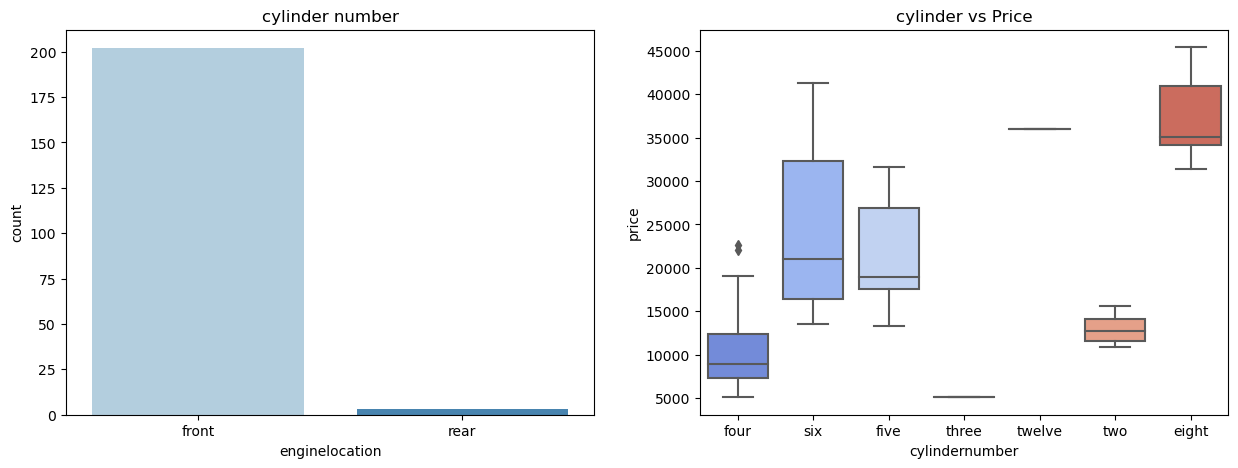

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('cylinder number')
sns.countplot(df.enginelocation, palette=("Blues"))

plt.subplot(1,2,2)
plt.title('cylinder vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("coolwarm"))



we can conclude that more the cylinder more pricier it is

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'fuel_System vs Price'}, xlabel='fuelsystem', ylabel='price'>

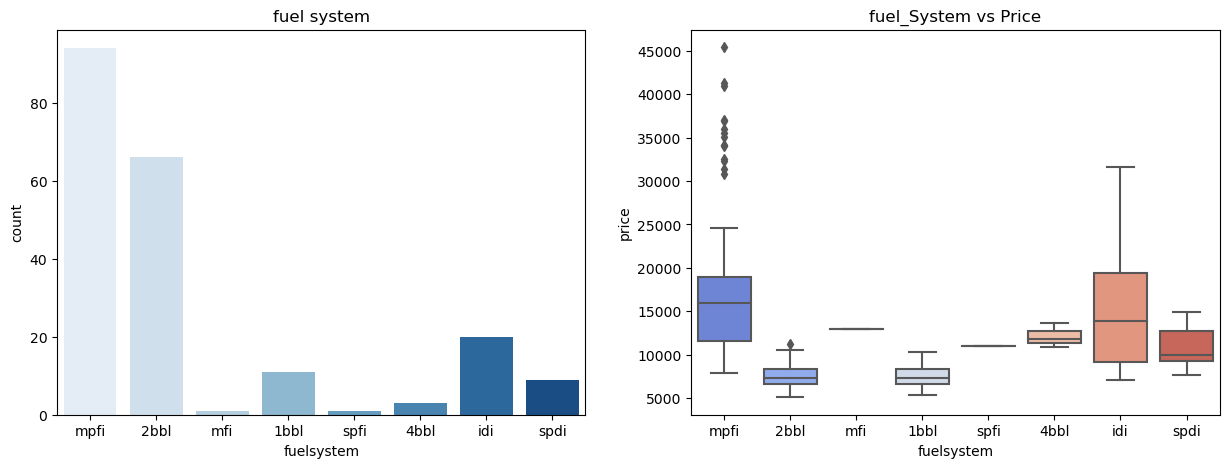

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('fuel system')
sns.countplot(df.fuelsystem, palette=("Blues"))

plt.subplot(1,2,2)
plt.title('fuel_System vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price, palette=("coolwarm"))

mpfi= multi ports fuel injecton
id=indirect fuel injection

The advantages of the indirect injection (IDI) engine are its quieter combustion and a combustion system that is more amenable to high speed operation. The disadvantage of the IDI engine, is that the direct injection (DI) engine has a 10–15% lower fuel consumption.

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'drive_wheel vs Price'}, xlabel='drivewheel', ylabel='price'>

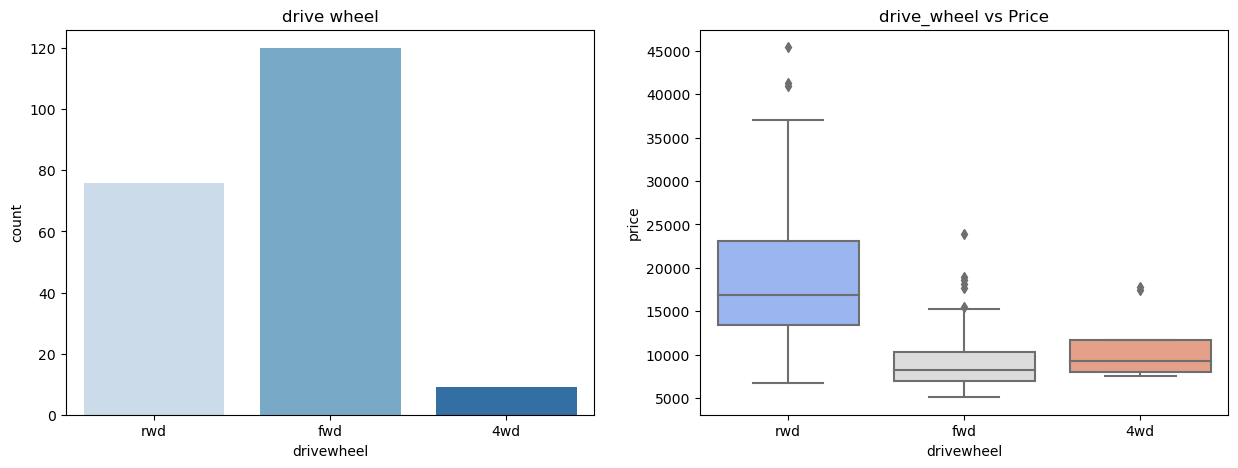

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('drive wheel')
sns.countplot(df.drivewheel, palette=("Blues"))

plt.subplot(1,2,2)
plt.title('drive_wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("coolwarm"))



rear wheel drive are more costilier followed by 4 wheel drive and forward wheel drive, this 
depends upon car brand and its price which may vary due to various reason.

<Figure size 1500x700 with 0 Axes>

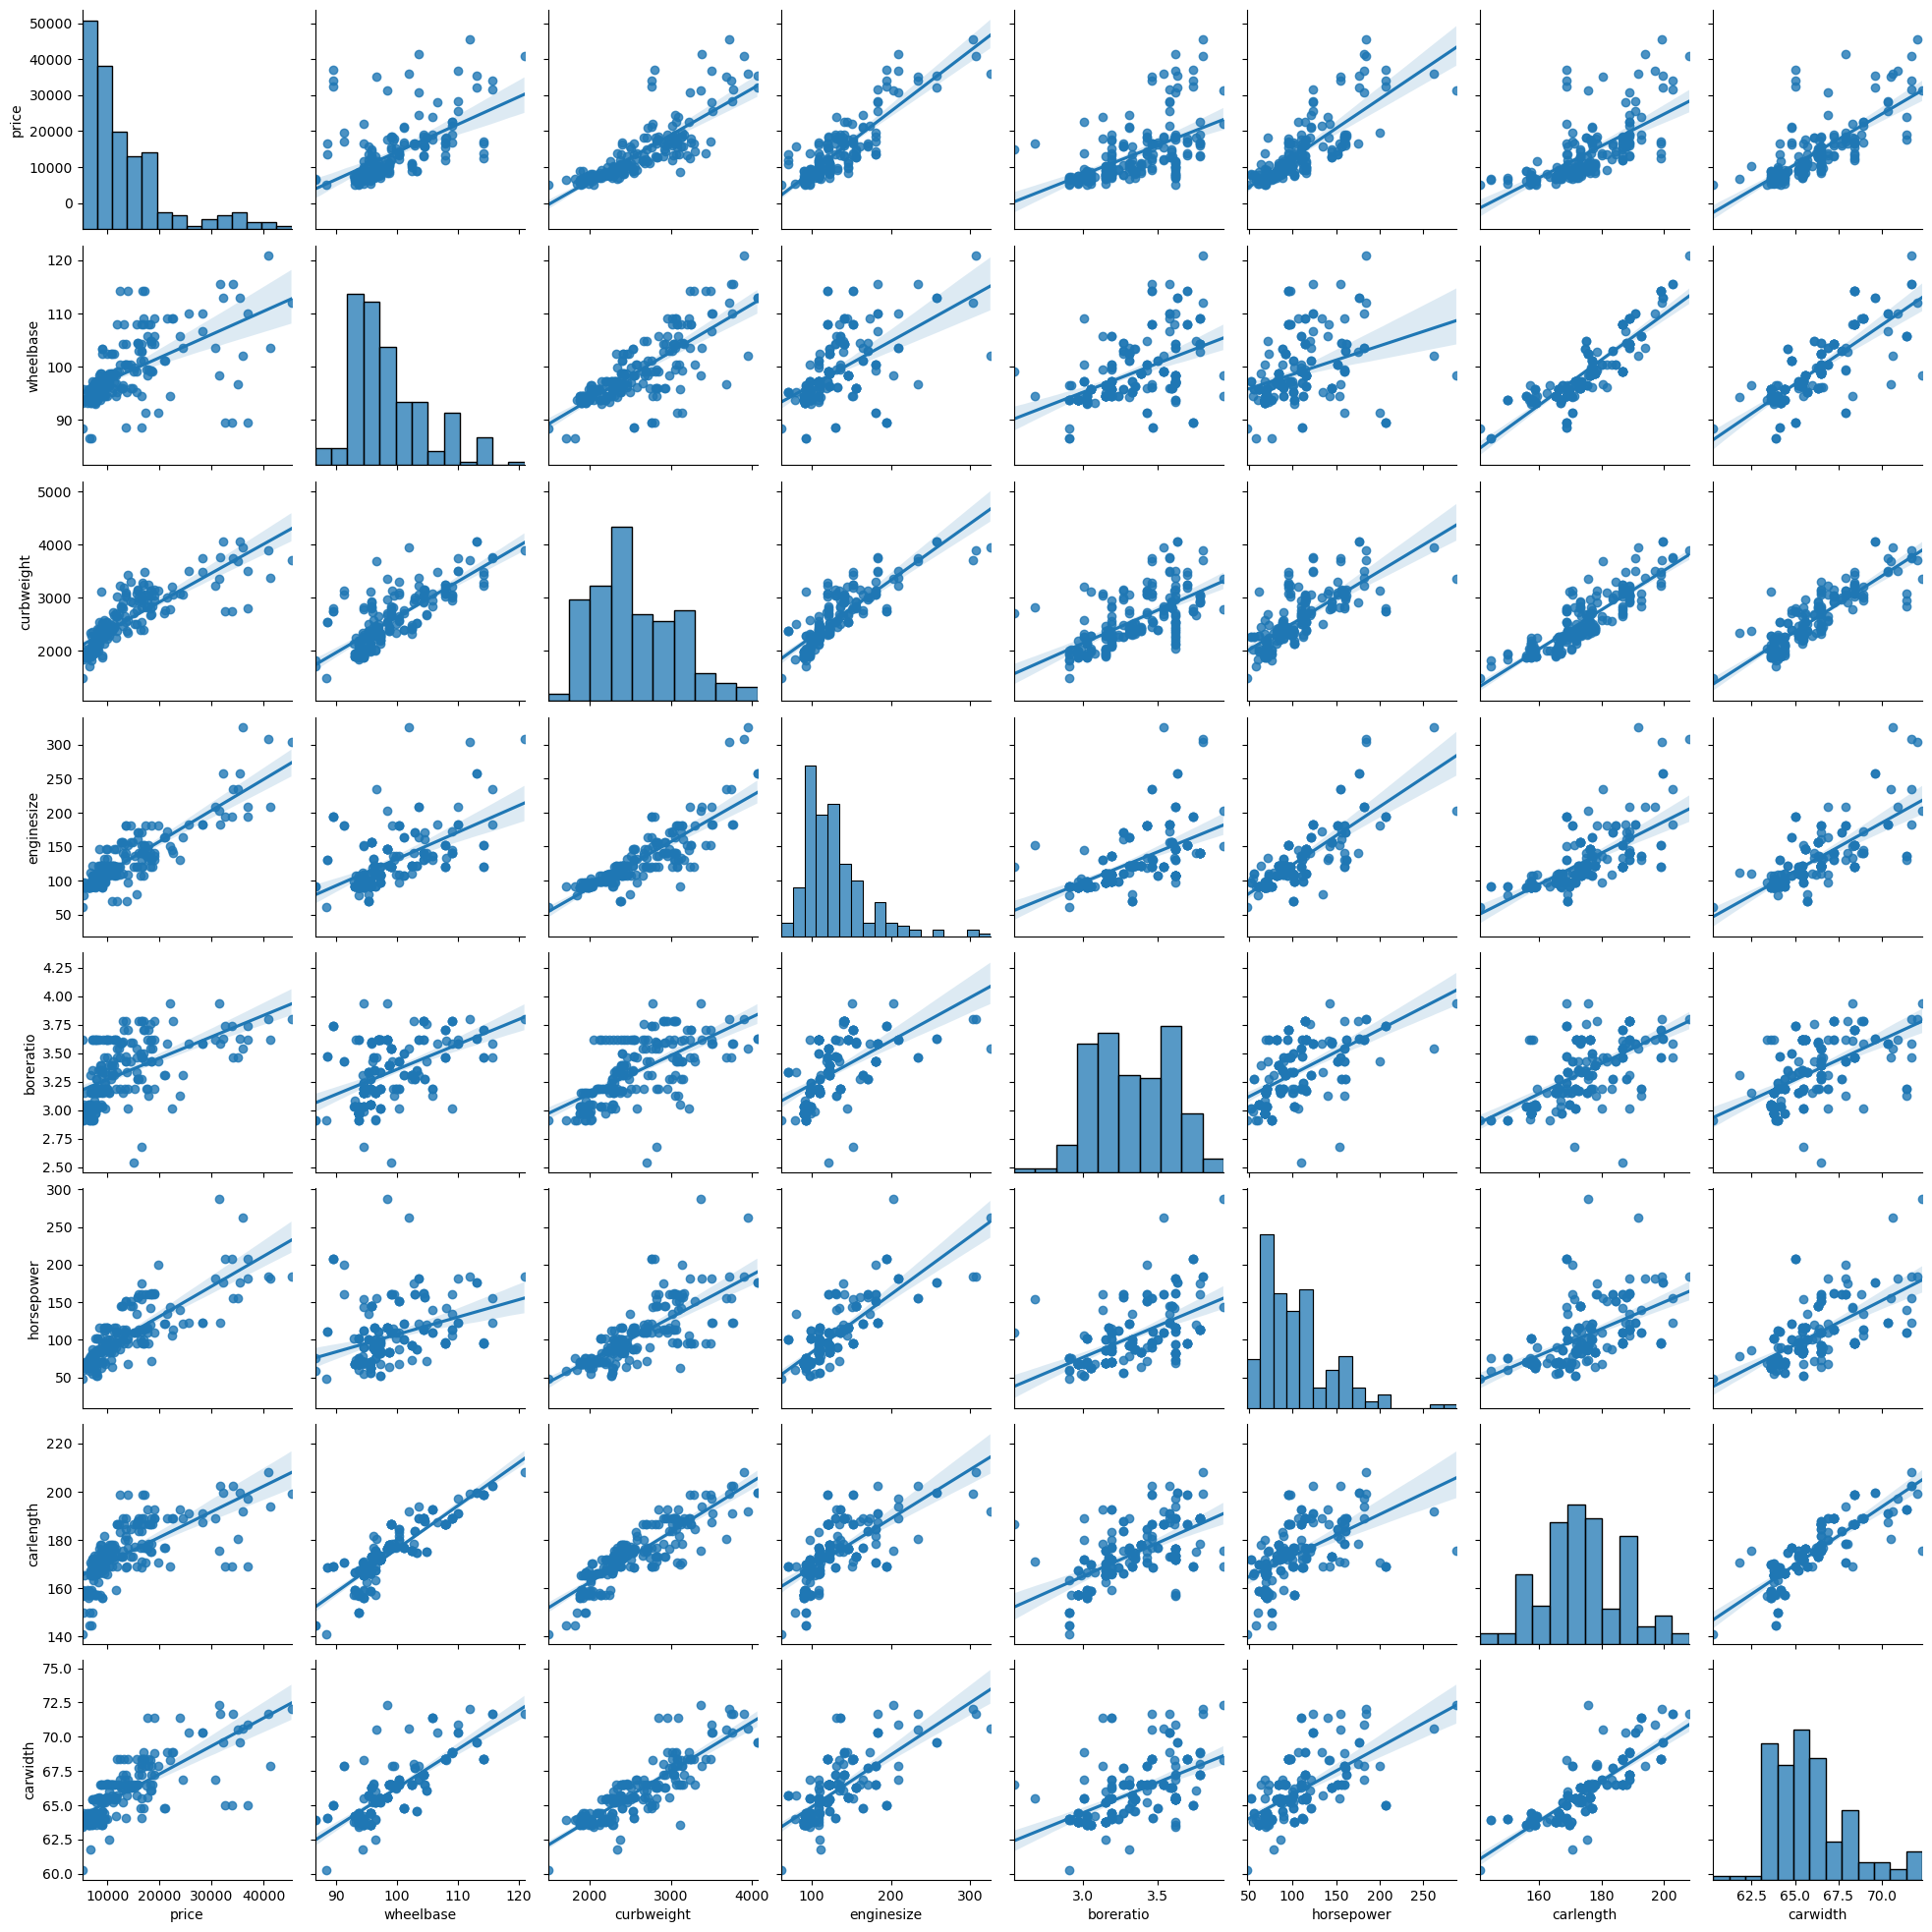

In [18]:
plt.figure(figsize=(15,7))
car1 = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber',
           'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
sns.pairplot(car1,kind='reg')

In [52]:
#concatinating the dummines column into main df
final=pd.concat([df,dummy1,dumy2,dumy3,dumy4,dumy5,dumy6],axis=1)

In [46]:
final.head()

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,two,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,two,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,two,front,94.5,171.2,65.5,52.4,2823,152,...,1,0,0,0,0,0,0,0,1,0
3,4,2,four,front,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,1,0,0,0
4,5,2,four,front,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,1,0,0,0


In [26]:
final.columns

Index(['car_ID', 'symboling', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler

## model preparation

we will try different model and check there r2 score and comapre which one has higher score

one hot encoding the data for different regression model

In [30]:
df_onehot=df.copy()

In [33]:
df.drop('car_ID',axis=1,inplace=True)

In [35]:
df_onehot.head()

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,two,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,two,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,two,front,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,four,front,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,four,front,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [47]:
onehot_features=pd.get_dummies(df_onehot,drop_first=True)
# turned the dataset into dummy variable where all the categori variable are                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \
#turned into one hot encoding

In [37]:
onehot_features.drop('car_ID',axis=1,inplace=True)

In [48]:
onehot_features.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_toyouta,CompanyName_vokswagen,CompanyName_volkswagen,CompanyName_volvo,CompanyName_vw
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

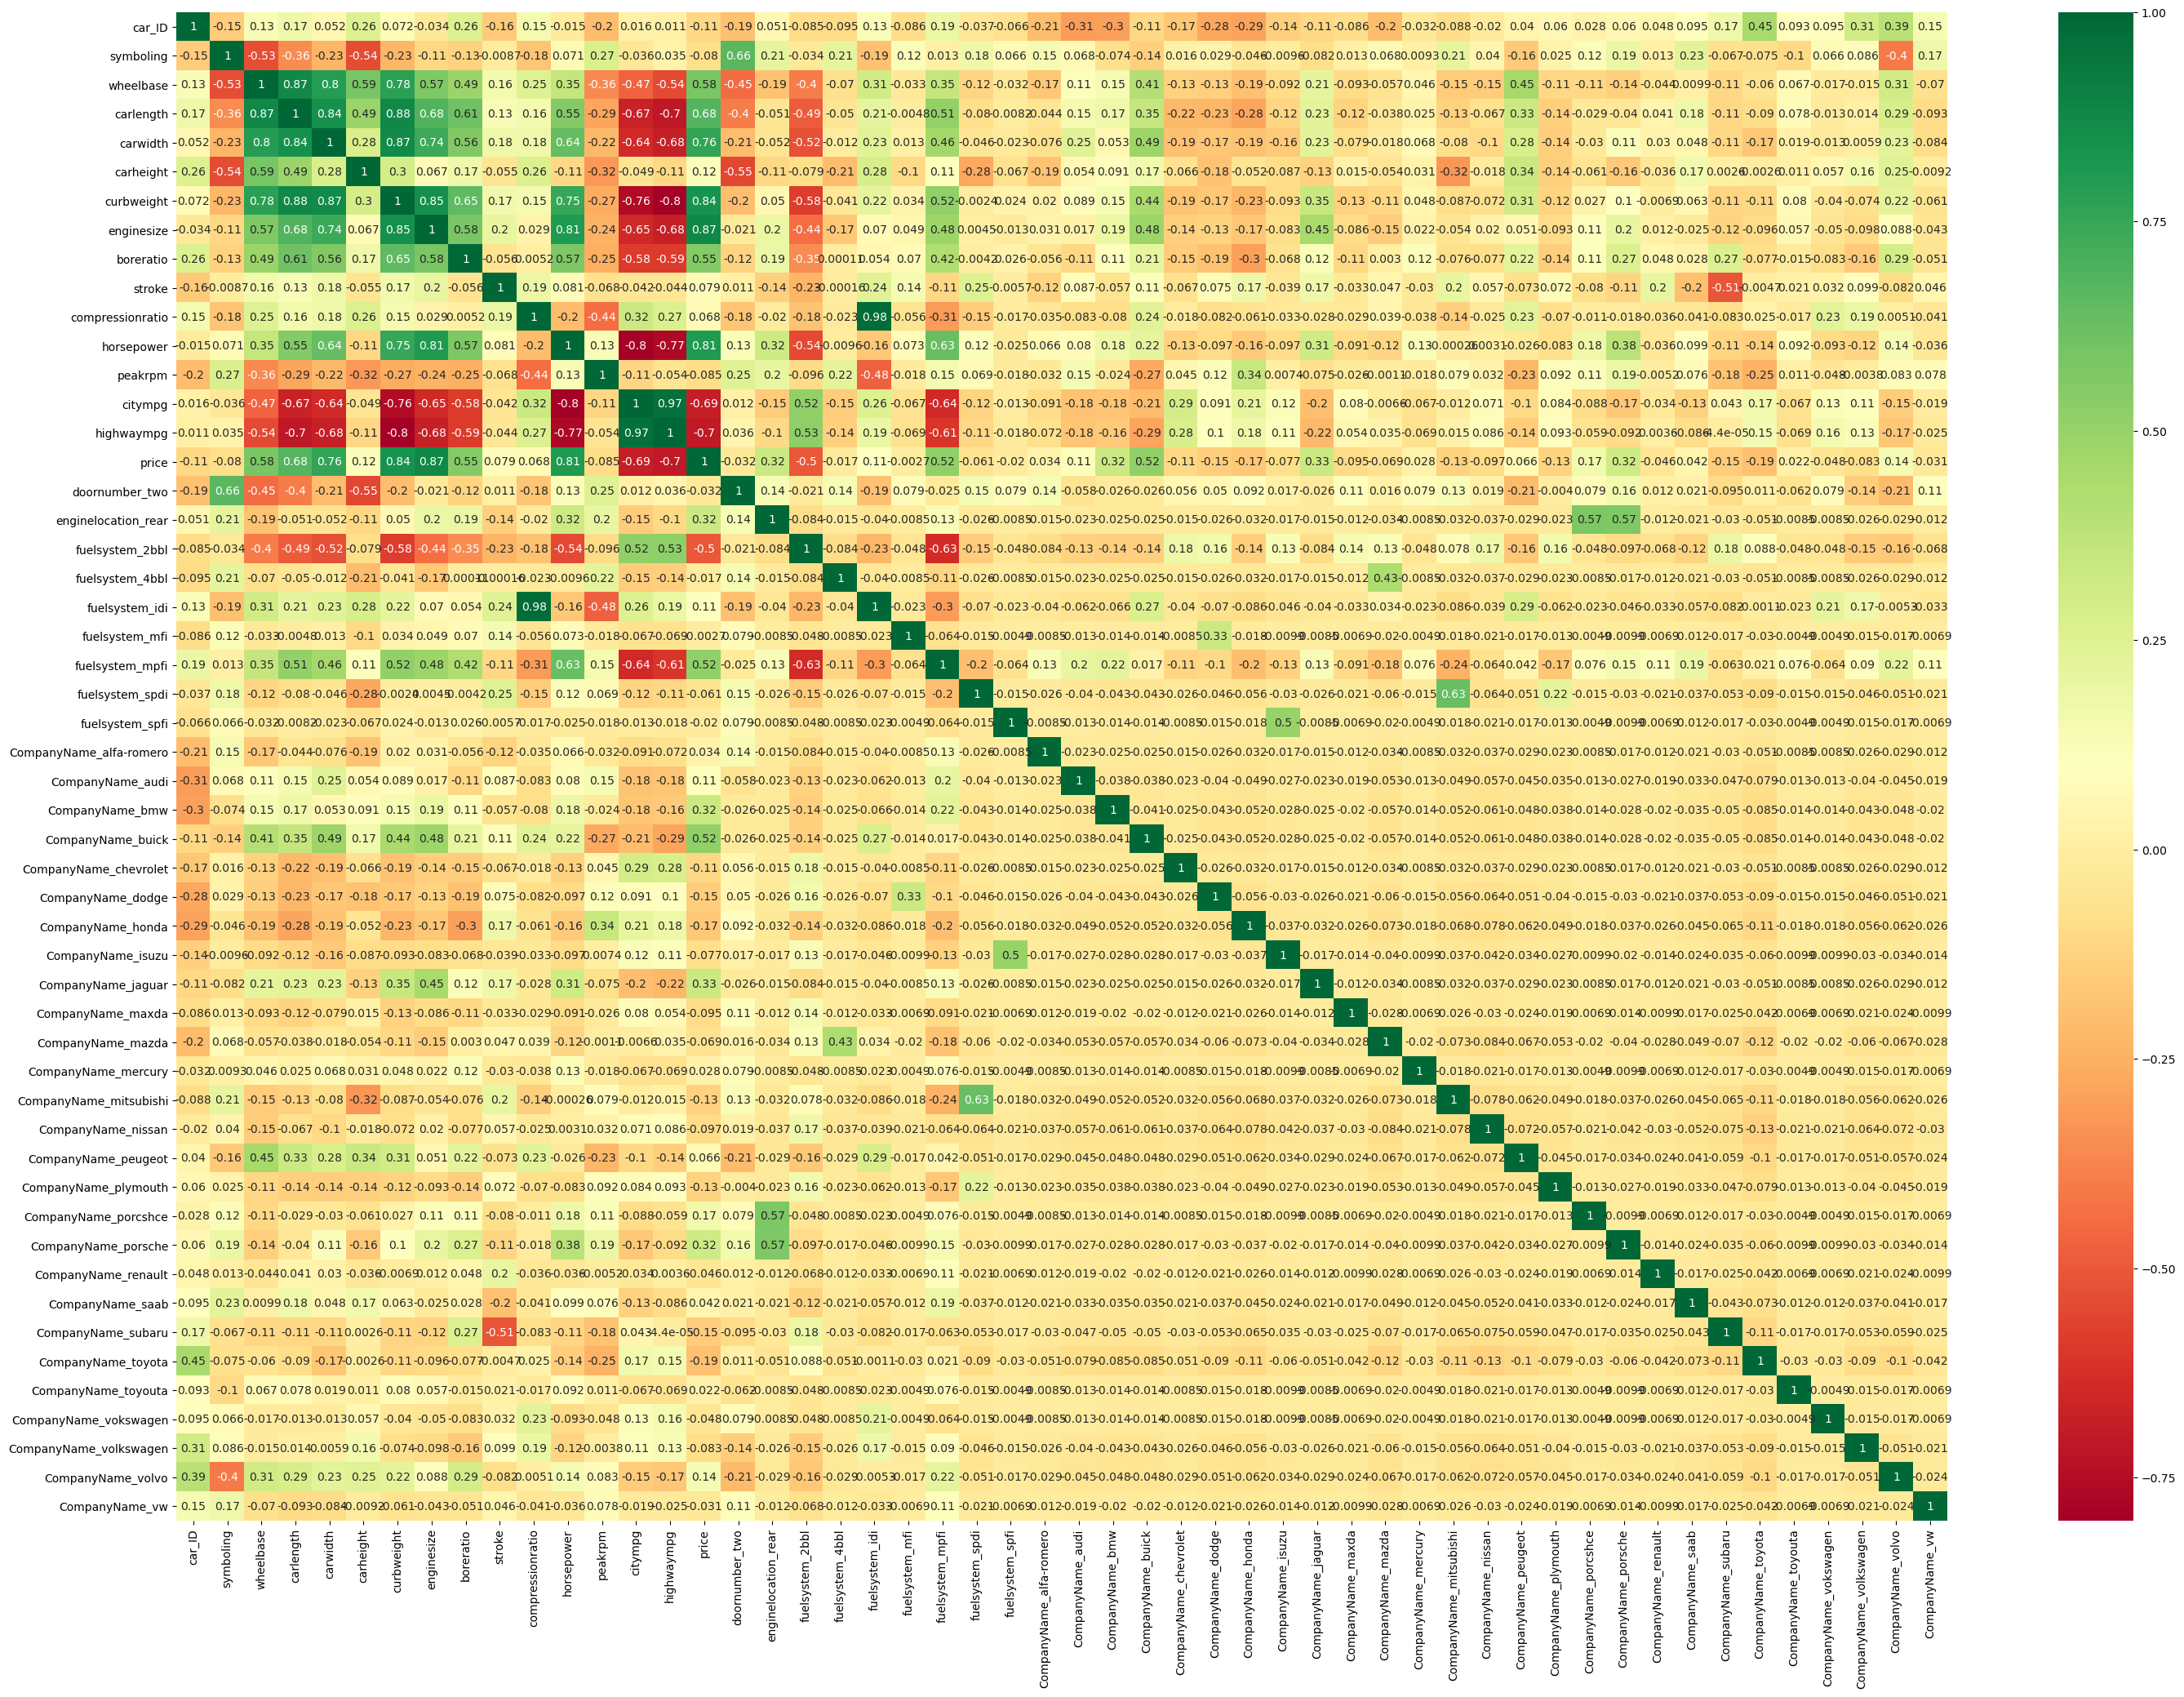

In [50]:
#calculating the corelation
corrmat1=onehot_features.corr()
top_corr1=corrmat1.index
plt.figure(figsize=(35,24))

sns.heatmap(onehot_features[top_corr1].corr(),annot=True,cmap='RdYlGn')

we can see that thre are few features which are highly corelated so we will try to remove these

In [53]:
#CREATING A COPY OF THE dataframe
df12=onehot_features.copy()

In [55]:
df12.drop(['car_ID'],axis=1,inplace=True)

In [56]:
df3=pd.get_dummies(df12,drop_first=True)

In [57]:
X1=df3.drop(['price'],axis=1)
y1=df3.price

In [95]:
import statsmodels.api as sm
y19 = df3.price  # response
X19 =df3.drop(['price'],axis=1)  # predictor
X19 = sm.add_constant(X19)  # Adds a constant term to the predictor
X19.head()

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_toyouta,CompanyName_vokswagen,CompanyName_volkswagen,CompanyName_volvo,CompanyName_vw
0,1.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#lets split the data
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2)

In [86]:
#scalling the data using mixmax scaller,
# Transforming the features by minmaxscaler so that each feature come to a given range.
scaler=MinMaxScaler()
#fitng the data 
scaler.fit(X1_train)

MinMaxScaler()

In [77]:
#transfroming train and test set
X1_train_scaled=scaler.transform(X1_train)
X1_test_scaled=scaler.transform(X1_test)

In [ ]:
#df12.drop(['price_ranges','CompanyName'],axis=1,inplace=True)

In [70]:
#RFE
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [87]:
lr.fit(X1_train_scaled,y1_train) #fiting the data into the linear model

LinearRegression()

In [64]:
# Fix the dimensions of the target array
y_train1 = y1_train.values.reshape(-1, 1)
y_test1 = y1_test.values.reshape(-1, 1)

In [65]:
#making prediction
predictionS=lr.predict(X1_test_scaled)

In [66]:
predictionS

array([15929.55545835, 15510.07662499,  8085.72815496,  1143.43571585,
        7384.96919293,  7029.93194775,  8202.32854983, 13338.83713838,
        8176.15581951, 20868.45194634,  6100.28547655,  4758.20112578,
       15018.76503464, 11701.8667856 ,  8896.25461741,  7068.29689288,
       11476.61158551, 16075.65887532,  6086.92653306,  7647.34267334,
        9515.90674826, 18303.74341598, 15843.46952617, 19195.93118444,
        6323.51694539, 11020.41076735,  7127.15566453, 11340.32544056,
        7643.60255041, 30164.29498619, 16894.13865566, 11040.05390705,
       14586.77193314,  6891.78311234,  9167.3976696 ,  8886.36062885,
        7729.38023103,  6979.26078454, 12733.08643325,  7690.38419782,
       14139.2942365 ])

r score with all the features

In [449]:
linera_regressionScore=r2_score(y1_test,predictionS)
print('Linear Regression R2 Score :',linera_regressionScore)

Linear Regression R2 Score : 0.8370341180526706


by looking at the r2 we can say that our linear regression model is able to predict 83% of the data corectly which is a good score for this type of problem

In [113]:
#calculating root means square error
import sklearn.metrics as metrics
print('RMSE Score of Linear Regression :',np.sqrt(metrics.mean_squared_error(y1_test,predictionS)))

RMSE Score of Linear Regression : 2493.9474299987824


In [81]:
#deciding whioch feature are relevant for the model
lr.fit(X1_train_scaled,y1_train)
rfe3 = RFE(lr, 10)
rfe3_value = rfe3.fit(X1_train_scaled, y1_train)

/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [571]:
#those feature which are true are relevent feature for the model and false are not
list(zip(X1_train.columns,rfe3_value.support_))

[('symboling', False),
 ('wheelbase', False),
 ('carlength', False),
 ('carwidth', True),
 ('carheight', False),
 ('curbweight', True),
 ('enginesize', True),
 ('boreratio', False),
 ('stroke', False),
 ('compressionratio', False),
 ('horsepower', True),
 ('peakrpm', False),
 ('citympg', False),
 ('highwaympg', False),
 ('doornumber_two', False),
 ('enginelocation_rear', True),
 ('fuelsystem_2bbl', False),
 ('fuelsystem_4bbl', False),
 ('fuelsystem_idi', False),
 ('fuelsystem_mfi', False),
 ('fuelsystem_mpfi', False),
 ('fuelsystem_spdi', False),
 ('fuelsystem_spfi', False),
 ('CompanyName_alfa-romero', True),
 ('CompanyName_audi', False),
 ('CompanyName_bmw', True),
 ('CompanyName_buick', True),
 ('CompanyName_chevrolet', False),
 ('CompanyName_dodge', False),
 ('CompanyName_honda', False),
 ('CompanyName_isuzu', False),
 ('CompanyName_jaguar', True),
 ('CompanyName_maxda', False),
 ('CompanyName_mazda', False),
 ('CompanyName_mercury', False),
 ('CompanyName_mitsubishi', False),
 ('C

In [83]:
print(X1_train.columns[rfe3_value.support_])

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower',
       'enginelocation_rear', 'CompanyName_alfa-romero', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_jaguar', 'CompanyName_porsche'],
      dtype='object')


(4641.7392418262625, 45847.8070207731, 970.8400461623344, 42176.90782510917)

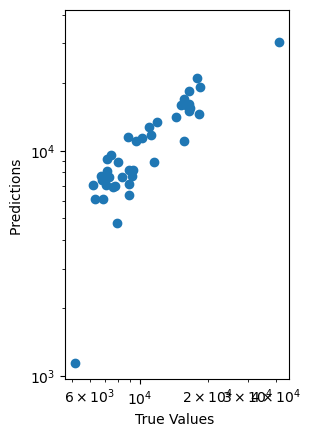

In [84]:
g=plt.scatter(y1_test, predictionS)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

graph showing true value in x axis and predicted value in y axis its seems our model is predicting 
above average which is a good sign, and we have also seen this in the r2 score above which is 83%
menas our model LINEAR MODEL is predicting 80% of the data correctly.

# catboost Model

In [404]:
#importing required packges
from  sklearn.metrics import mean_squared_error,r2_score
from catboost import CatBoostRegressor

In [416]:
# cb_df.drop(['CarName','doornumber'],axis=1,inplace=True)
cb_df.drop('symboling',axis=1,inplace=True)

In [417]:
#spliting the data
cbX=cb_df.drop(['price'],axis=1)
cby=cb_df.price

In [418]:
cbX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   carbody           205 non-null    object 
 3   drivewheel        205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [419]:
# #defining categorical feature or els the model will consoder it as a numerical
catcolm=cbX.select_dtypes(include=['object']).columns.to_list()
print('categorical columns : ',catcolm)

categorical columns :  ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [530]:
#splitting the data into train test
cbX_train,cbX_test,cby_train,cby_test=train_test_split(cbX,cby,test_size=0.2)

In [539]:
# model_Cat=CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function='RMSE')
cb=CatBoostRegressor()
cb.fit(cbX_train,cby_train,cat_features=catcolm,eval_set=(cbX_test,cby_test),plot=True,silent=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [426]:
#making the prediction
y_predict= cb.predict(cbX_test)

In [427]:
y_predict

array([ 7388.70913781,  6326.42231587, 31533.66562898, 16525.65051193,
       29566.06367249,  7932.88827664, 11233.95473902, 16185.97028279,
       17571.95547457,  6349.67546395, 18736.03634247,  7445.91234216,
        7304.05371193,  9283.01303531,  7052.65636548, 13766.60130968,
       18033.34653756,  6488.59813825,  8746.74060764,  8663.02880769,
       15638.90636037,  9963.83915025, 14614.31662157,  9654.47575766,
       12957.64242874, 11756.5656646 ,  7359.56296947,  7388.70913781,
       14110.82154913, 11545.03125254, 16529.36972093,  5870.62750245,
       12243.71378305, 21347.67588242,  6490.87274034, 10830.81567483,
        6183.79296639,  7828.78461609,  8578.75730607, 13669.81503413,
        7828.66503144])

catboost regression before hyperparameter

In [531]:
#R2 Score
r2_test_catboost = r2_score(cby_test,y_predict)                                                                

using grid search for hyperparameter tuning 

In [430]:
#hypertuning the model using gridsearch cv
from sklearn.model_selection import GridSearchCV

number of cross-validation you have to try for each selected set of hyperparametera with the help of GridSearchCV

In [439]:
#seeting the parameters
param={'max_depth':[3,4,5,8],'n_estimators':[150,200,300,500],'learning_rate':[0.01,0.02,0.04,1]}

In [545]:
grid=GridSearchCV(estimator=CatBoostRegressor(cat_features=catcolm,silent=True),param_grid=param,cv=6,scoring='r2')

In [546]:
grid.fit(cbX_train,cby_train)

GridSearchCV(cv=6,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f8b172a87b8>,
             param_grid={'learning_rate': [0.01, 0.02, 0.04, 1],
                         'max_depth': [3, 4, 5, 8],
                         'n_estimators': [150, 200, 300, 500]},
             scoring='r2')

In [547]:
#getting the best patameter after hypertune
print('best parameter : ',grid.best_params_)

best parameter :  {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500}


In [534]:
#making the prediction
y_predict_hyper= grid.predict(cbX_test)
y_predict_hyper

array([ 7437.73110416, 15615.71985536, 36562.28163507, 15514.97805081,
       17715.1641872 , 15719.48195322, 11673.1823635 ,  6673.7423716 ,
        7549.43067212, 27866.48515012, 22139.0186239 ,  9050.71782587,
       16572.2740575 , 10465.51793946,  6569.7138302 , 10104.26378065,
        6963.59891579,  9503.35247949,  6403.01759685,  8587.93753454,
       14956.08607413, 20580.45469326, 11911.039018  , 30244.31336602,
        9845.89738576, 12236.54568116, 14831.84398524, 15086.47772673,
       10307.54586951, 14719.50167616, 14844.79630711, 18685.68481412,
       19700.1051388 ,  6636.50084331, 12443.32389036, 10035.41447481,
       28354.7299831 ,  6993.68968867,  6631.4117679 , 12216.18076381,
        7053.1969197 ])

In [570]:
#R2 Score
r2_test_catboost1 = r2_score(cby_test,y_predict_hyper)        

In [548]:
#setting the hyperparameter result in the model and fiting it again
cb_hyper=CatBoostRegressor(learning_rate=0.04, max_depth= 3, n_estimators=500,silent=True)
cb_hyper.fit(cbX_train,cby_train,cat_features=catcolm,eval_set=(cbX_test,cby_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# random forest model

In [181]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000)
rfr_tuning=RandomForestRegressor()

In [455]:
#we will turn categorical data into numbers using one hot encoding
rf_df=onehot_features.copy()

In [456]:
rf_df['fuelsystem_spfi'].value_counts()

0    204
1      1
Name: fuelsystem_spfi, dtype: int64

In [457]:
rf_X=rf_df.drop(['price'],axis=1)
rf_y=rf_df.price

In [458]:
#spliitting the data
rf_Xtrain,rf_Xtest,rf_ytrain,rf_ytest=train_test_split(rf_X,rf_y,test_size=0.2)

In [459]:
#trainin the model
rfr.fit(rf_Xtrain,rf_ytrain)

RandomForestRegressor(n_estimators=1000)

In [460]:
#making the prediction
rf_prediction=rfr.predict(rf_Xtest)
rf_prediction

array([ 6515.044   ,  8068.407   ,  9998.723   , 10600.2695  ,
        7879.3415  ,  7498.928   , 32728.0555  ,  8787.4295  ,
        8369.953   ,  7754.3215  , 14876.745504, 10065.787   ,
        6139.03    ,  8708.7435  , 15179.432167,  6978.649   ,
       17848.065171, 16376.421167, 15501.150167,  6762.869   ,
       17098.56967 , 14848.530167,  8954.702   ,  6566.3315  ,
        5954.728   , 15110.241167, 15614.208   ,  8077.414   ,
        7151.673   , 14301.389   ,  7057.037   ,  6995.941   ,
       35126.7905  ,  8007.002   , 15406.698   ,  9215.477   ,
       38376.037   , 18217.739344,  9485.939   ,  7376.455   ,
        8722.9765  ])

Ramdom forest Score before hyperparameter tuning

In [464]:
randomforest_r2score=rfr.score(rf_Xtest,rf_ytest)
print('r2 score of random forest model ',randomforest_r2score)

r2 score of random forest model  0.9764492817888432


In [590]:
#using grid search for parameter selection
rf_grid={'n_estimators': [200,300],
 'min_samples_split': [8,10,15],
 'min_samples_leaf': [6,8],
 'max_features':[5,7],
 'max_depth': [80,90],
 'bootstrap': [True]}

In [592]:
gride_search_result=GridSearchCV(estimator=rfr_tuning,param_grid=rf_grid,cv=6,verbose=0)

In [593]:
gride_search_result.fit(rf_Xtrain,rf_ytrain)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_features': [5, 7], 'min_samples_leaf': [6, 8],
                         'min_samples_split': [8, 10, 15],
                         'n_estimators': [200, 300]})

In [594]:
gride_search_result.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 200}

In [472]:
rf_model_grid_search=RandomForestRegressor(n_estimators=300,min_samples_split=8,min_samples_leaf=4,
                              max_features=7,max_depth=90,bootstrap=False)

In [473]:
rf_model_grid_search.fit(rf_Xtrain,rf_ytrain)

RandomForestRegressor(bootstrap=False, max_depth=90, max_features=7,
                      min_samples_leaf=4, min_samples_split=8,
                      n_estimators=300)

random forest after hyperparameter tuning

In [475]:
random_result_score=rf_model_grid_search.score(rf_Xtest,rf_ytest)
print('r2 score of random forest model',random_result_score )

r2 score of random forest model 0.9467389398161354


# decision tree model


Decision tree is unstable because training a tree with a slightly different sub-sample causes the structure of the tree to change drastically. It overfits by learning from noise data as well and optimises for that particular sample, which causes its variable importance order to change significantly.

In [200]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
Dtree=DecisionTreeRegressor()
std_slc = StandardScaler()

In [482]:
dtree=onehot_features.copy()

In [202]:
dtree_X=dtree.drop(['price'],axis=1)
dtree_y=dtree.price

In [203]:
#spliitting the data
dt_Xtrain,dt_Xtest,dt_ytrain,dt_ytest=train_test_split(dtree_X,dtree_y,test_size=0.2)

In [204]:
#fitting the model
Dtree.fit(dt_Xtrain,dt_ytrain)

DecisionTreeRegressor()

In [205]:
#predicting
dt_predict=Dtree.predict(dt_Xtest)
dt_predict

array([17669., 34028., 11245., 15510., 11595.,  6649., 11595.,  9549.,
        7775., 17669., 17669., 19699.,  6295., 15985., 36880.,  6095.,
       11245., 14399.,  6918., 15998.,  7295.,  5399.,  6529.,  5389.,
       10898., 11900.,  7198.,  8845.,  6095., 28176.,  9258., 15750.,
       18150.,  8495.,  7499., 17950.,  9549., 12964., 12290., 34028.,
        7957.])

decission tree score before hyperparameter tuning.

In [476]:
#without tunning 
decission_tree_result=Dtree.score(dt_Xtest,dt_ytest)
print('decission dree r2 without tunning',decission_tree_result)

decission dree r2 without tunning 0.8620927283607537


In [573]:
#searchgrid for decission tree to select best parameter for the model
dt_grid={
'criterion':['mse'],
'min_samples_split': [15,25],
 'min_samples_leaf': [4,6],
 'max_features':[7,15],
 'max_depth': [90,100]
 }

In [574]:
dt_grid=GridSearchCV(estimator=Dtree,param_grid=dt_grid,cv=5,verbose=0)

In [575]:
dt_grid.fit(dt_Xtrain,dt_ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [90, 100],
                         'max_features': [7, 15], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [15, 25]})

In [576]:
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 90,
 'max_features': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 15}

In [235]:
# setting the best parameter to the model and making the prediction once again
dt_grid_result=DecisionTreeRegressor(criterion='mse',
 max_depth=120,
 max_features = 15,
 min_samples_leaf = 4,
 min_samples_split = 15,
 splitter = 'best')

In [478]:
dt_grid_result.fit(dt_Xtrain,dt_ytrain)

DecisionTreeRegressor(max_depth=120, max_features=15, min_samples_leaf=4,
                      min_samples_split=15)

decission tree result after hyperparameter tuning.

In [479]:
decission_tree_tune=dt_grid_result.score(dt_Xtest,dt_ytest)

# xgboost Regressor

In [236]:
import xgboost as xgb
from yellowbrick.regressor import residuals_plot,prediction_error

In [237]:
xg_df=onehot_features.copy()

In [238]:
xgb_X=xg_df.drop(['price'],axis=True)
xgb_y=xg_df.price

In [239]:
#train test split of xgboost
xg_Xtrain,xg_Xtest,xg_ytrain,xg_ytest=train_test_split(xgb_X,xgb_y,test_size=0.2)

In [240]:
xgg_reg=xgb.XGBRFRegressor()

In [241]:
xgg_reg.fit(xg_Xtrain,xg_ytrain)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [246]:
y_xgpredict=xgg_reg.predict(xg_Xtest)
xgy_true=xg_ytest

In [483]:
#calculating r square
Xgboost_r_sqr=r2_score(xgy_true,y_xgpredict)

xgboost score before hyperparameter tuning

XGBoost r2 score  :  0.9621250689645413


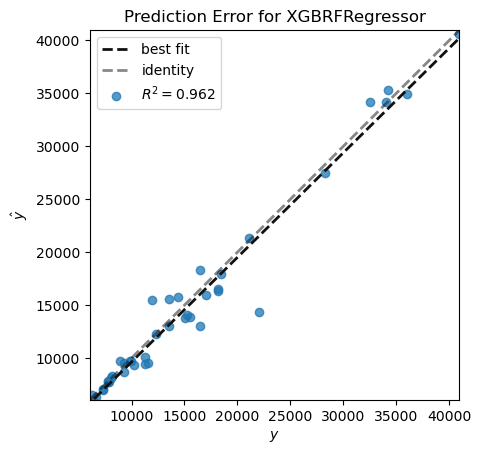

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRFRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [484]:
print('XGBoost r2 score  : ',Xgboost_r_sqr)
#plotting the prediction error plot
print(prediction_error(xgg_reg,xg_Xtrain,xg_ytrain,xg_Xtest,xg_ytest))

xgboost score after hyperparameter tuning

In [577]:
parameters = {
            'objective':['reg:squarederror'],
            'learning_rate': [0.9,1], 
            'max_depth': [10,15],
            'n_estimators': [500,1000],
            'booster':['gbtree'],
            'reg_lambda':[1]}

In [578]:
xgb_grid_result = GridSearchCV(estimator=xgg_reg,param_grid=parameters,cv = 3,verbose=0)

In [579]:
xgb_grid_result.fit(xg_Xtrain,xg_ytrain)

GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bytree=1,
                                      gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints='',
                                      max_delta_step=0, max_depth=6,
                                      min_child_weight=1, missing=nan,
                                      monotone_constraints='()',
                                      n_estimators=100, n_jobs=8,
                                      num_parallel_tree=100,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0,
                                      scale_pos_weight=1, tree_method='exact',
                                      validate_parameters=1, verbosity=None),
             param_g

In [580]:
xgb_grid_result.best_params_

{'booster': 'gbtree',
 'learning_rate': 1,
 'max_depth': 10,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'reg_lambda': 1}

In [253]:
#setting the best parameter to the model and making prediction
xgg_reg1=xgb.XGBRFRegressor(booster='gbtree',
 learning_rate= 1,
 max_depth = 10,
 n_estimators = 1000,
 objective = 'reg:squarederror'
 )

In [490]:
xgboost_tune=xgg_reg1.score(xg_Xtest,xg_ytest)

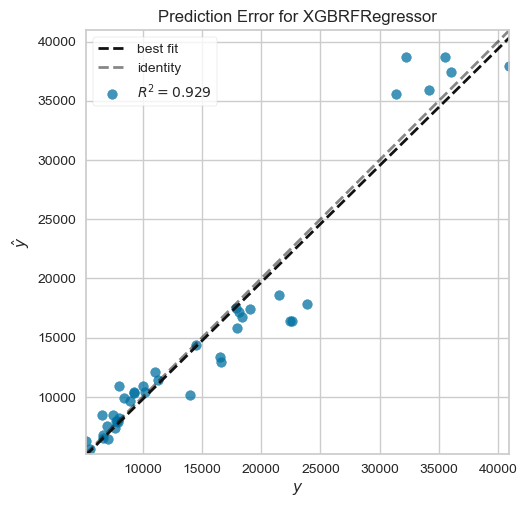

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRFRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [952]:
#plotting the prediction error plot
print(prediction_error(xgg_reg1,xg_Xtrain,xg_ytrain,xg_Xtest,xg_ytest))

# adaboost Regressor

In [265]:
from sklearn.ensemble import AdaBoostRegressor
ada_bt=AdaBoostRegressor()

In [266]:
ada_df=onehot_features.copy()

In [267]:
ada_X=ada_df.drop(['price'],axis=True)
ada_y=ada_df.price

In [268]:
#train test split of xgboost
ada_Xtrain,ada_Xtest,ada_ytrain,ada_ytest=train_test_split(ada_X,ada_y,test_size=0.2)

In [269]:
ada_bt.fit(ada_Xtrain,ada_ytrain)

AdaBoostRegressor()

adaboost Regressor score before hyprerparameter tuning

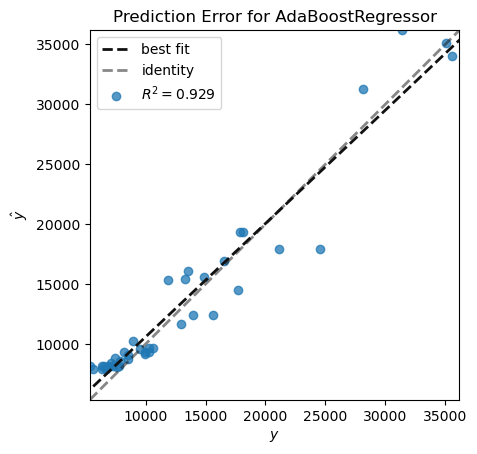

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [491]:
adaboost_result=ada_bt.score(ada_Xtest,ada_ytest)
#plotting the prediction error plot
print(prediction_error(ada_bt,ada_Xtrain,ada_ytrain,ada_Xtest,ada_ytest))

In [581]:
ada_param = { 
            'learning_rate': [0.8,0.9,1], 
            
            'n_estimators': [250,500,1000],
            'loss':['linear', 'square', 'exponential']}

In [582]:
ada_grid_result = GridSearchCV(estimator=ada_bt,param_grid=ada_param,cv = 3,verbose=0)

In [583]:
ada_grid_result.fit(ada_Xtrain,ada_ytrain)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.8, 0.9, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [250, 500, 1000]})

In [585]:
ada_grid_result.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 500}

In [275]:
adaboost_hyper=AdaBoostRegressor(learning_rate= 0.9, loss= 'linear',n_estimators= 250)

In [276]:
adaboost_hyper.fit(ada_Xtrain,ada_ytrain)

AdaBoostRegressor(learning_rate=0.9, n_estimators=250)

adaboost Regressor score after hyprerparameter tuning

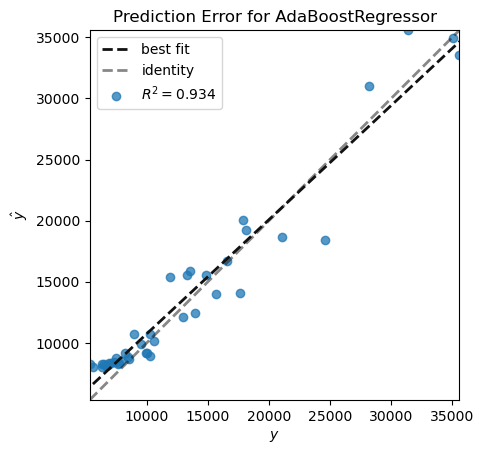

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [492]:
ada_boost_tune=adaboost_hyper.score(ada_Xtest,ada_ytest)
#plotting the prediction error plot
print(prediction_error(adaboost_hyper,ada_Xtrain,ada_ytrain,ada_Xtest,ada_ytest))

# k nearest_neighbour

In [278]:
from sklearn.neighbors import KNeighborsRegressor
knear=KNeighborsRegressor()

In [279]:
knear_df=onehot_features.copy()

In [280]:
knear_X=knear_df.drop(['price'],axis=True)
knear_y=knear_df.price

In [281]:
#train test split of xgboost
knear_Xtrain,knear_Xtest,knear_ytrain,knear_ytest=train_test_split(knear_X,knear_y,
                                                                   test_size=0.2,random_state=12)

In [282]:
knear.fit(knear_Xtrain,knear_ytrain)

KNeighborsRegressor()

knn score before hyperparameter tuning

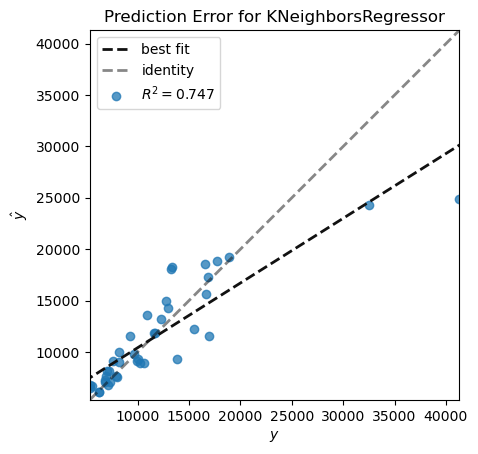

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [494]:
knn_score=(knear.score(knear_Xtest,knear_ytest))
#plotting the prediction error plot
print(prediction_error(knear,knear_Xtrain,knear_ytrain,knear_Xtest,knear_ytest))

In [586]:
knear_param = { 
    'algorithm': ['auto'],
 'leaf_size': [30,50,10],
 'metric': ['minkowski'],
 'n_neighbors': [5,8,10],
 'p': [1],
 'weights':['uniform', 'distance']}

In [587]:
knear_grid_result = GridSearchCV(estimator=knear,param_grid=knear_param,cv = 3,verbose=0)

In [588]:
knear_grid_result.fit(knear_Xtrain,knear_ytrain)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 50, 10],
                         'metric': ['minkowski'], 'n_neighbors': [5, 8, 10],
                         'p': [1], 'weights': ['uniform', 'distance']})

In [589]:
knear_grid_result.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [289]:
knear_new=KNeighborsRegressor(algorithm= 'auto',
 leaf_size= 30,
 metric= 'minkowski',
 n_neighbors= 5,
 p= 1,
 weights= 'distance')

In [290]:
knear_new.fit(knear_Xtrain,knear_ytrain)

KNeighborsRegressor(p=1, weights='distance')

In [ ]:
knn after hyperparameter tunning the data

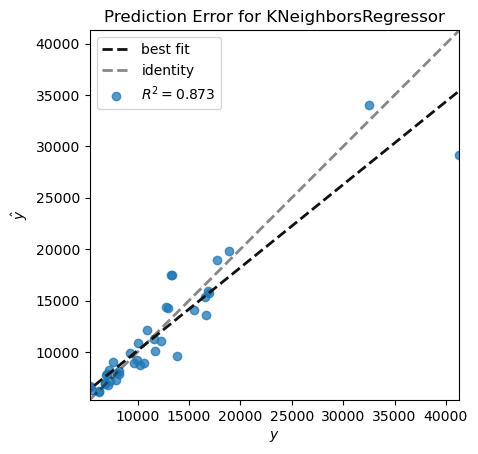

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                model=None)


/Users/draculalemon/opt/anaconda3/envs/mlmodel/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [504]:
knn_tune=knear_new.score(knear_Xtest,knear_ytest)
#plotting the prediction error plot
print(prediction_error(knear_new,knear_Xtrain,knear_ytrain,knear_Xtest,knear_ytest,random_state=23))

comparaing all the score of a regression model to see which one is best for our problems

# model r2 score before hyperparameter tuning

In [513]:
print('R2 of logistic Regression :      ',linera_regressionScore)
print('R2 of CatBoost Regressior :      ',r2_test_catboost)
print('R2 of AdaBoost Regression :      ',adaboost_result)
print('R2 of Knn Regression :           ',knn_score)
print('R2 of RandomForest  Regression : ',randomforest_r2score)
print('R2 of Decision Tree  Regression :',decission_tree_result)
print('R2 of XGboost  Regressor :       ',Xgboost_r_sqr)

R2 of logistic Regression :       0.8370341180526706
R2 of CatBoost Regressior :       0.9123484630119677
R2 of AdaBoost Regression :       0.9293066227799409
R2 of Knn Regression :            0.7470563740901597
R2 of RandomForest  Regression :  0.9764492817888432
R2 of Decision Tree  Regression : 0.8620927283607537
R2 of XGboost  Regressor :        0.9621250689645413


# model r2 score after hyperparameter tuning

In [528]:
print('R2 of CatBoost Regressior :      ',r2_test_catboost1)
print('R2 of AdaBoost Regression :      ',ada_boost_tune)
print('R2 of Knn Regression :           ',knn_tune)
print('R2 of RandomForest  Regression : ',random_result_score)
print('R2 of Decision Tree  Regression :',decission_tree_tune)
print('R2 of XGboost  Regressor :       ',xgboost_tune)

R2 of CatBoost Regressior :       0.9209938678604359
R2 of AdaBoost Regression :       0.9343580443659255
R2 of Knn Regression :            0.8733971740182702
R2 of RandomForest  Regression :  0.9467389398161354
R2 of Decision Tree  Regression : 0.8860133445654216
R2 of XGboost  Regressor :        0.9623586225805778
